## Generating sequences of (pseudo-) random numbers with Numpy

Let us now take a quick look at an important sub-package inside Numpy, the
".random" library. This library contains a large set of functions to generate (sequences of) 'random' numbers in different ways and following different probability distributions. To be more correct, these sequences should be referred to as "pseudo-random" numbers. Check this [link](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) to see an exact definition.  
If you want to know why we need to generate random numbers at all, it is because they are the basis of a large class of important computational techniques broadly referred to with the suggestive name ***Monte Carlo Simulations***, part of an even larger class of simulations based on the use of random distributions called ***Stochastic simulations***. These type of simulations allows us to study a huge variety of (natural) phenomena, from the way nanoparticles or proteins self-assemble into larger structures to the way alloys re-organise during a temperature treatment, or to study how birds move in a flock or bacterial colonies grows in a certain environment. However, they are not limited to natural phenomena and in fact stochastic / Monte Carlo simulations are routinarily used to calculate very complex multi-dimensional integrals, or modelling the stock market, among other things. In all these simulations, generating random numbers in the correct way is **crucial**.  

To make you better understand (hopefully!) I will try to provide a little background and practical examples. In practice, we want to answer the question: *What does it mean to return a random number from a certain probability distribution*?  
First of all, let us notice that a probability distribution is a function that assigns to any number the probability to extract it, following a certain formula. For a *discrete* distribution (where the outcome of this random selection is a finite set of values) saying the random element `I` is extracted from the distribution `P( I = i; {q} )` (where `{q} = {q1, q2, ..., qN}` are N parameters characterising the distribution), means that, if you extract a large number of values, the *fraction of times* `I` is equal to "i" converges to P(i).  
Be careful: each time you extract the element from the distribution its value will be randomly chosen, but when you choose a large sample, the exact value `i` will be chosen a fraction of times that *tends to* P(i) (when the number of extractions goes to infinity).  
Take for example a typical (cubic) dice with 6 faces. The probability distribution is `P( I = i )` is `1/6` if `i` is any of the numbers `[1,2,3,4,5,6]`, and zero otherwise.  

For a *continuous* distribution, things are somewhat similar. Saying the number `X` is extracted from `P(x)` means
that the probability to obtain a value between `x` and `x+dx` converges to `P(x)dx`, again when you extract a large number of values. The Gaussian probability distribution is the one you are probably already familiar with among continuous distributions. Note that in this case it does not make sense to ask "how many times will I get exactly the value x", but you can ask "how many times I will get a number in a certain interval around the value x". You might want to have a look at [this wikipedia page](https://en.wikipedia.org/wiki/Probability_distribution#Discrete_probability_distribution) to get more comfortable with these concepts (and for a more formal defintion), although running a few examples is probably a more pragmatic way to procede for what we need here.

Before we go on, however, let me be pedantic and reiterate once again one very important fact about random number generators and the sequences that are output from them: **each time you call a random number generator the sequence of number will be different** and the **exact sequence itself does not really have any meaning**. It is its average behaviour when a long sequence is generated (or over a large number of sequences) that matters!

Let us now take a practical approach and have a look at a selected few but very important functions inside the `random` package of Numpy. As usual, if you want to know more, you can look at the specific [documentation of the random package here](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random) and in particular the random [number generator section](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator) to unload its full capabilities!

First, run the next cell to load the `.random` subpackage of the numpy library.

In [2]:
from numpy import random as rnd

### The `.randint` function

```Python
.randint( nmin, nmax, nSamples ) 
```

returns an array of `nSamples` integer random number with equal probability between `nmin` (included) and `nmax` (excluded). In other words, each number between `nmin` and `nmax` is extracted with the same probability of `P = 1 / (nmax - nmin)`. Note that if a single argument is given, this is intepreted as `.randint( 0, nmax, 1)` and if two arguments only are given, this is intepreted as `.randint( nmin, nmax, 1)`.  

Play a little around by modifying and running the cell below with different values of `nmin`, `nmax` and `nsamples` to convince yourself. Also, notice how the probability to obtain a certain value converges to the right probability.


In [7]:
nmin = 1
nmax = 3
nsamples = 20000
a = rnd.randint(nmin,nmax,nsamples)
b = rnd.randint(nmin,nmax,nsamples)
#print(a)
#print(b)
print( "Are all elements of a and b the same?", ( a == b ).all() ) # Here we compare whether the two sequences are the same...
a = list(a)

for i in range( nmin, nmax ):
    print( "List a, Element", i, "Probability", a.count(i) / len(a) )

b = list(b)
for i in range( nmin, nmax ):
    print( "List b, Element ", i, "Probability", b.count(i) / len(b) )

    

Are all elements of a and b the same? False
List a, Element 1 Probability 0.4952
List a, Element 2 Probability 0.5048
List b, Element  1 Probability 0.4982
List b, Element  2 Probability 0.5018


### The `.rand` function

```Python
.rand( n1, n2 ) 
```
 
returns a 2D array of `n1 x n2` elements where each entry is a random number chosen with the same probability (also called a "flat probability" in jargon) from the interval `[0,1]`. In practice, this is a flat, continuous probability distribution defined as `P( X = c ) = {0, if c < 0 or c > 1; 1 otherwise }` and it is basically the equivalent of the ".randint" function but for a continuous distribution. Note that `np.random.rand( n1 )` is equivalent to np.random.rand( n1, 1 ). Have a look at what happen running the cell below:

In [8]:
n1 = 3
n2 = 2
print("np.random.rand( n2, n2 )")
a = rnd.rand( n2, n2 )
print(a)
print("np.random.rand( n1, n2 )")
a = rnd.rand( n1, n2 )
print(a)
print("np.random.rand( n2, n1 )")
a = rnd.rand( n2, n1 )
print(a)
print("np.random.rand( n1 )")
a = rnd.rand( n1 )
print(a)

np.random.rand( n2, n2 )
[[0.3280316  0.86427678]
 [0.94929551 0.83536211]]
np.random.rand( n1, n2 )
[[0.0130332  0.72749059]
 [0.62311661 0.64393501]
 [0.97500198 0.25629124]]
np.random.rand( n2, n1 )
[[0.87225593 0.55770469 0.4649467 ]
 [0.17205619 0.80778139 0.45699206]]
np.random.rand( n1 )
[0.71525026 0.6485574  0.58347771]


### Transforming between different probability distributions

There is actually a formal mathematical procedure to map one probability distribution onto another based on the definition of integrals.  More precisely, the idea is to answer the general question: if I know how to generate a random variable x with probability P(x), how will the values of a function f(x) be distributed (what is the probability function P(f)? 

We will not indulge on the general question here, although you should definitely check [this link](https://www.cl.cam.ac.uk/teaching/2003/Probability/prob11.pdf) if interested, it is very well written and it is relatively simple math! Instead, because of its importance for practical applications, we will try to answer the related (and much simpler) question: What if you wanted to extract a random number with a flat probability distribution from the interval `[nmin,nmax]` rather than `[0,1]`? 

The answer to the previous question is based on the idea of rescaling and shifting the interval, which can be implemented using the following algorithm (implemented in the cell below):
1. Extract a random number X from `[0,1]`
2. Multiply this number by (nmax - nmin). At this point, you obtain a number X' randomly distributed in the interval `[0,nmax-nmin]`.
3. Add `nmin` to X'. You obtain a number X'' randomly distributed between `[nmin,nmax]`

To see that this procedure works, one way is to visualise its outcome. In general, for visualising probability distributions (in 1D) a quick graphical way is to plot the histogram of the obtained values with the function:

```Python
matplotlib.pyplot.hist([array of random numbers], bins = N, density = True )
```

from the `pyplot` package of the `matplotlib` library in Python (we have used it before to plot graphs!), see the full documentation [here](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html). Basically, this function takes a list of randomly generated numbers and puts them into `N` bins of equal width, then returns an histogram where the height of each bin is proportional to the number of times a randomly generated number from the list ended up in that bin. More precisely, the height of the histogram is the value of the associated  probability distribution function, properly normalised so that the total probability sums up to the value of 1 when one considers all the possible bins.  
Have a look at the example below to see!

With 10^3 random values


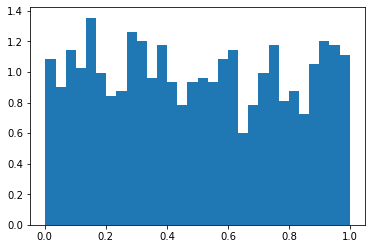

With 10^5 random values


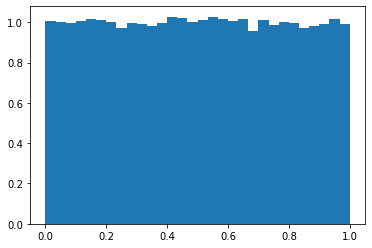

With 10^5 random values and scaling to obtain in the interval [20,100]


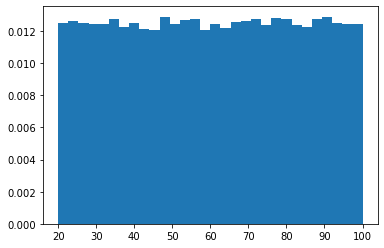

In [9]:
from matplotlib import pyplot as plt

nValues1 = 1000
nValues2 = 10000
nValues3 = 100000
nBins = 30
nmin = 20
nmax = 100
ar1 = rnd.rand( nValues1 )
ar2 = rnd.rand( nValues3 )
ar3 = rnd.rand( nValues3 ) * (nmax-nmin) + nmin
plt.xlabel = 'X'
plt.ylabel = 'P(X)'
print('With 10^3 random values')
plt.hist(ar1, bins = nBins, density = True )
plt.show()
print('With 10^5 random values')
plt.hist(ar2, bins = nBins, density = True )
plt.show()
print('With 10^5 random values and scaling to obtain in the interval [20,100]')
plt.hist(ar3, bins = nBins, density = True )
plt.show()

### Extracting numbers from a list of possible values: the `.choice` function

If you want to extract elements from a pre-defined list of potential values (they need not be numbers, it can be, for example, a list of strings, or truly any object you want!), then the `.choice()` function is what you need. Its general syntax is:

```Python
.choice( a, size=None, replace=True, p=None)
```

where `a` must be your list of potential values and `size` is the number of random elements to generate from that list. The boolean `replace` is `True` if every time you choose an element from the same initial list `a`, whereas you should set it to `False` if you want to remove the value from the list `a` once it is extracted. Finally, `p` is a list (of the same length of `a`) that specifies the probability to pick a specific element in `a`. More precisely, `p[i]` gives you the probability to pick the element `a[i]`. Note that for this reason the sum of all values in `p` **must** be equal to 1 (or Python will throw an Error message!). By default, if no value is given for `p` it is assumed that each number in `a` can be extracted with the same flat probability `(1/len(a))`. 

Have a look at the example below, and play around with the values to see what happens!

In [10]:
mySize = 200
list1 = ["a","b","c"]
myP = [ 0.5, 0.5, 0.0 ]
print('Value of the p array: {0}. Note that "c" is never extracted because it has probability 0!'.format(myP) )
a = rnd.choice( list1, size = mySize, replace = True, p = myP )
print(a)
a = list(a)
for i in list1:
    print( "Element", i, "Frequency", a.count(i) / len(a) )

Value of the p array: [0.5, 0.5, 0.0]. Note that "c" is never extracted because it has probability 0!
['a' 'b' 'a' 'b' 'b' 'b' 'a' 'b' 'b' 'a' 'a' 'b' 'b' 'a' 'b' 'a' 'a' 'a'
 'b' 'b' 'a' 'b' 'b' 'a' 'b' 'a' 'a' 'b' 'a' 'b' 'a' 'a' 'a' 'a' 'b' 'b'
 'b' 'b' 'a' 'a' 'a' 'a' 'b' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'a' 'b' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'b' 'a' 'a' 'b' 'b' 'b' 'b'
 'b' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'a' 'b' 'b' 'b' 'a' 'a' 'b' 'a'
 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'b' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'a' 'a'
 'a' 'a' 'a' 'b' 'b' 'b' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'a' 'b' 'b' 'a' 'a'
 'a' 'b' 'b' 'a' 'b' 'b' 'b' 'a' 'b' 'b' 'b' 'a' 'b' 'a' 'b' 'a' 'a' 'a'
 'a' 'a' 'b' 'b' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b' 'a' 'a' 'b' 'b' 'b'
 'a' 'b' 'b' 'b' 'a' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'a' 'a' 'b' 'b' 'b' 'b'
 'a' 'b' 'b' 'b' 'a' 'a' 'a' 'b' 'a' 'a' 'b' 'b' 'a' 'a' 'b' 'a' 'a' 'b'
 'b' 'b']
Element a Frequency 0.525
Element b Frequency 0.475
Element c Frequency 0.0


### Other general probability distribution functions

Besides the flat one (provided by the `.rand()` function), Numpy has a wide range of continuous probability distributions to pick from, whose use depends on the specific phenomena to simulate. The complete list can be found at the bottom of [this page](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator).  

Here we only have a look at probably the most important one, or, better said, the most used in practical applications, the **gaussian distribution** defined as:

$G( x; \mu, \sigma ) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

This is found in the `.random` subpackage as:

'''Python
.normal( loc = 0, scale = 1.0, size = None )
'''

where `loc` ($\mu$ in the formula above) is the mean of the Gaussian distribution and `scale` ( = $\sigma$) its standard deviation. `size` specifies the number of random numbers to be extracted from the distribution, which are then return as a 1D array of size `size`. If instead `size = (n1,n2)` a `n1 x n2` 2D array is returned. Have a look at the next example to see what happens!

**Important reminder**: the mean and standard deviation of any given sequence will converge to the provided input parameter value for an infinite sequence of random numbers extracted. However, each time for a finite sequences of values you will obtain a different result!

In [11]:
nValues1 = 10
nValues2 = 10**2
nValues3 = 10**4

a = rnd.normal(0,1,nValues1)
print("a is")
print(a)
print("The mean is")
print( a.mean() )
print("The standard deviation is")
print(a.std() )

print("======================================")
print("======================================")
a = rnd.normal(0,1,nValues2)
print("a is")
print(a)
print("The mean is")
print( a.mean() )
print("The standard deviation is")
print(a.std() )

print("======================================")
print("======================================")
a = rnd.normal(0,1,nValues3)
print("Increasing the sequence length to {0} elements (not visualised). Now the mean is".format(nValues3))
print( a.mean() )
print("The standard deviation is")
print(a.std() )

print("======================================")
print("======================================")
a = rnd.normal(0,1,(5,5))
print("This is an example with a 2D array")
print(a)
print("The mean is")
print( a.mean() )
print("The standard deviation is")
print(a.std() )



a is
[ 0.18455015  1.62355291 -0.53814879  0.04541567  0.70942174 -1.00180773
  0.8028076   0.6886736  -0.28392564 -0.82931149]
The mean is
0.14012280221163723
The standard deviation is
0.7848150182601711
a is
[-1.24095476 -1.4773069  -0.39912269 -0.59874402 -2.77213513  0.18001652
 -0.2966719   0.8365429  -0.13686951  1.63136748  1.25828598 -0.47428697
  1.27456043  1.6304108   0.44607246  0.01798872 -0.63557618 -0.81573632
  0.63293907  0.0108417  -0.03144447 -0.56378979  1.61749912  0.45383225
  0.8232091  -1.81046934 -0.93120732 -1.77860889  0.17969143 -0.51138332
  0.18189919  1.05198334  0.46472978 -0.16493729  0.12320194  0.03511745
 -0.98813357  1.037047    0.30302984  0.34826304  1.44417628 -0.37241484
  1.14847316 -0.17570014  1.41989074  1.00077597 -0.0368446   0.29967888
 -0.08918619 -0.94097842  0.28757198  0.02917932  0.1660439   1.70097252
 -0.17697837  0.10844274  1.44776773 -0.7851891  -1.03915683  0.83542675
 -0.39374278  0.66461405 -1.70248321  0.19994337  2.39385371

You might want to write a piece of code below and use histograms to plot the arrays of Gaussian numbers above, to see if it indeed looks like what you expect!

In [ ]:
# Your code here